In [1]:
import tensorflow as tf
print tf.__version__
from selectors.deepfashion import get_image_with_bbox
from matplotlib import pyplot as plt
from PIL import Image
import PIL.ImageDraw as ImageDraw
import numpy as np
import PIL.ImageFont as ImageFont
from __future__ import division
%matplotlib inline

1.2.0


In [2]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color='red',
                               thickness=4,
                               display_str_list=(),
                               use_normalized_coordinates=True):
  """Adds a bounding box to an image.

  Each string in display_str_list is displayed on a separate line above the
  bounding box in black text on a rectangle filled with the input 'color'.

  Args:
    image: a PIL.Image object.
    ymin: ymin of bounding box.
    xmin: xmin of bounding box.
    ymax: ymax of bounding box.
    xmax: xmax of bounding box.
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list: list of strings to display in box
                      (each to be shown on its own line).
    use_normalized_coordinates: If True (default), treat coordinates
      ymin, xmin, ymax, xmax as relative to the image.  Otherwise treat
      coordinates as absolute.
  """
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  if use_normalized_coordinates:
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
  else:
    (left, right, top, bottom) = (xmin, xmax, ymin, ymax)
  draw.line([(left, top), (left, bottom), (right, bottom),
             (right, top), (left, top)], width=thickness, fill=color)
  try:
    font = ImageFont.truetype('arial.ttf', 24)
  except IOError:
    font = ImageFont.load_default()

  text_bottom = top
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle(
        [(left, text_bottom - text_height - 2 * margin), (left + text_width,
                                                          text_bottom)],
        fill=color)
    draw.text(
        (left + margin, text_bottom - text_height - margin),
        display_str,
        fill='black',
        font=font)
    text_bottom -= text_height - 2 * margin
    

def draw_bounding_box_on_image_array(image,
                                     ymin,
                                     xmin,
                                     ymax,
                                     xmax,
                                     color='red',
                                     thickness=4,
                                     display_str_list=(),
                                     use_normalized_coordinates=True):
  """Adds a bounding box to an image (numpy array).

  Args:
    image: a numpy array with shape [height, width, 3].
    ymin: ymin of bounding box in normalized coordinates (same below).
    xmin: xmin of bounding box.
    ymax: ymax of bounding box.
    xmax: xmax of bounding box.
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list: list of strings to display in box
                      (each to be shown on its own line).
    use_normalized_coordinates: If True (default), treat coordinates
      ymin, xmin, ymax, xmax as relative to the image.  Otherwise treat
      coordinates as absolute.
  """
  image_pil = Image.fromarray(np.uint8(image)).convert('RGB')
  draw_bounding_box_on_image(image_pil, ymin, xmin, ymax, xmax, color,
                             thickness, display_str_list,
                             use_normalized_coordinates)
  np.copyto(image, np.array(image_pil))

There are 52712 items in list_bbox_inshop.txt
There are 8214 items with [('clothes_type', 1), ('pose_type', 1)]
/notebooks/inshop/img/WOMEN/Blouses_Shirts/id_00000001/02_1_front.jpg
[49, 50, 235, 208]
0.1875
0.23046875
0.22265625


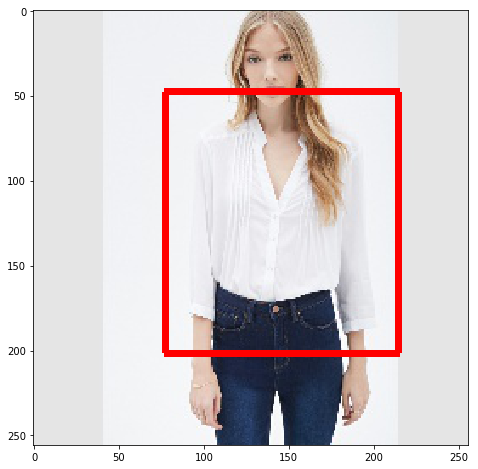

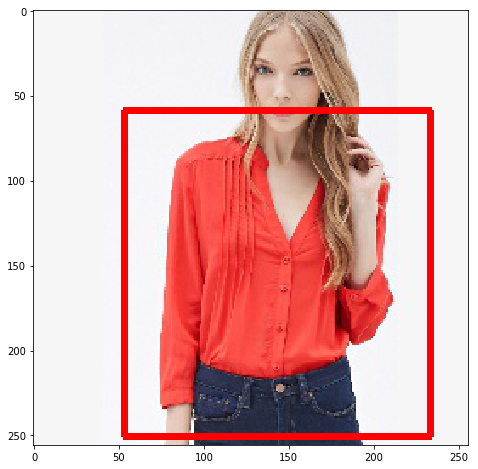

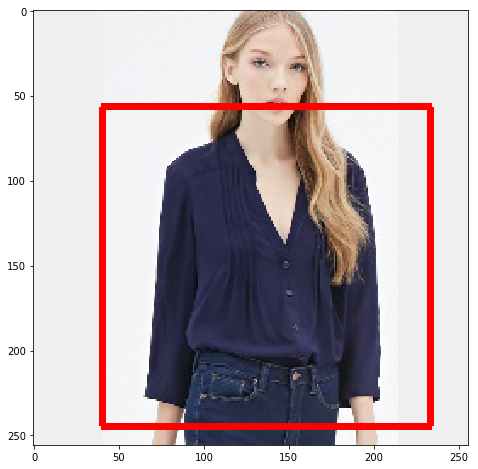

In [3]:
images, bboxes = get_image_with_bbox('top,front')

print images[0]
print bboxes[0]

start = 5000
num_images = 3
images = images[start:start+num_images]
bboxes = bboxes[start:start+num_images]

for image, bbox in zip(images, bboxes):
    image = Image.open(image)
    width, height = image.size
    image = load_image_into_numpy_array(image)
    ymin, xmin, ymax, xmax = bbox
    ymin = ymin/height
    ymax = ymax/height
    xmin = xmin/width
    xmax = xmax/width
    print ymin
    draw_bounding_box_on_image_array(image, ymin, xmin, ymax, xmax)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(image)